<a href="https://colab.research.google.com/github/kevinh1029/AirMouse/blob/main/ML_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setup environment
!apt-get -qq install xxd
!pip install pandas numpy matplotlib
!pip install tensorflow==2.12.0rc1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 103.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 130.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.1

<ipython-input-2-d4685a220d1a>:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'], 'b.', label='z', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gY'], 'r.', label='y', linestyle='solid', marker=',')


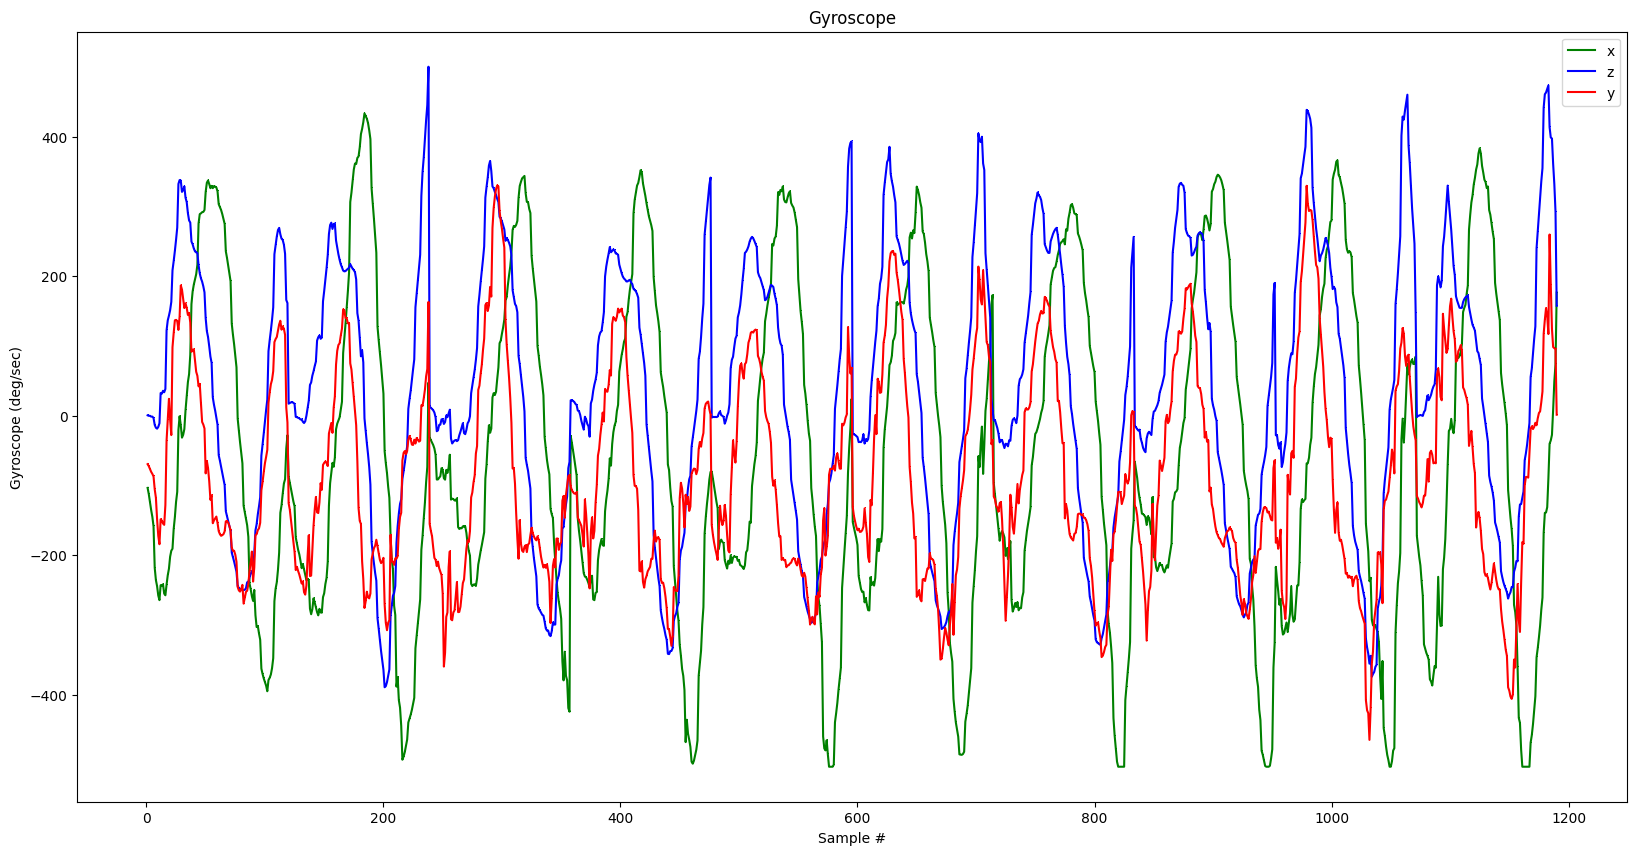

<ipython-input-2-d4685a220d1a>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'b.', label='z', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'r.', label='y', linestyle='solid', marker=',')


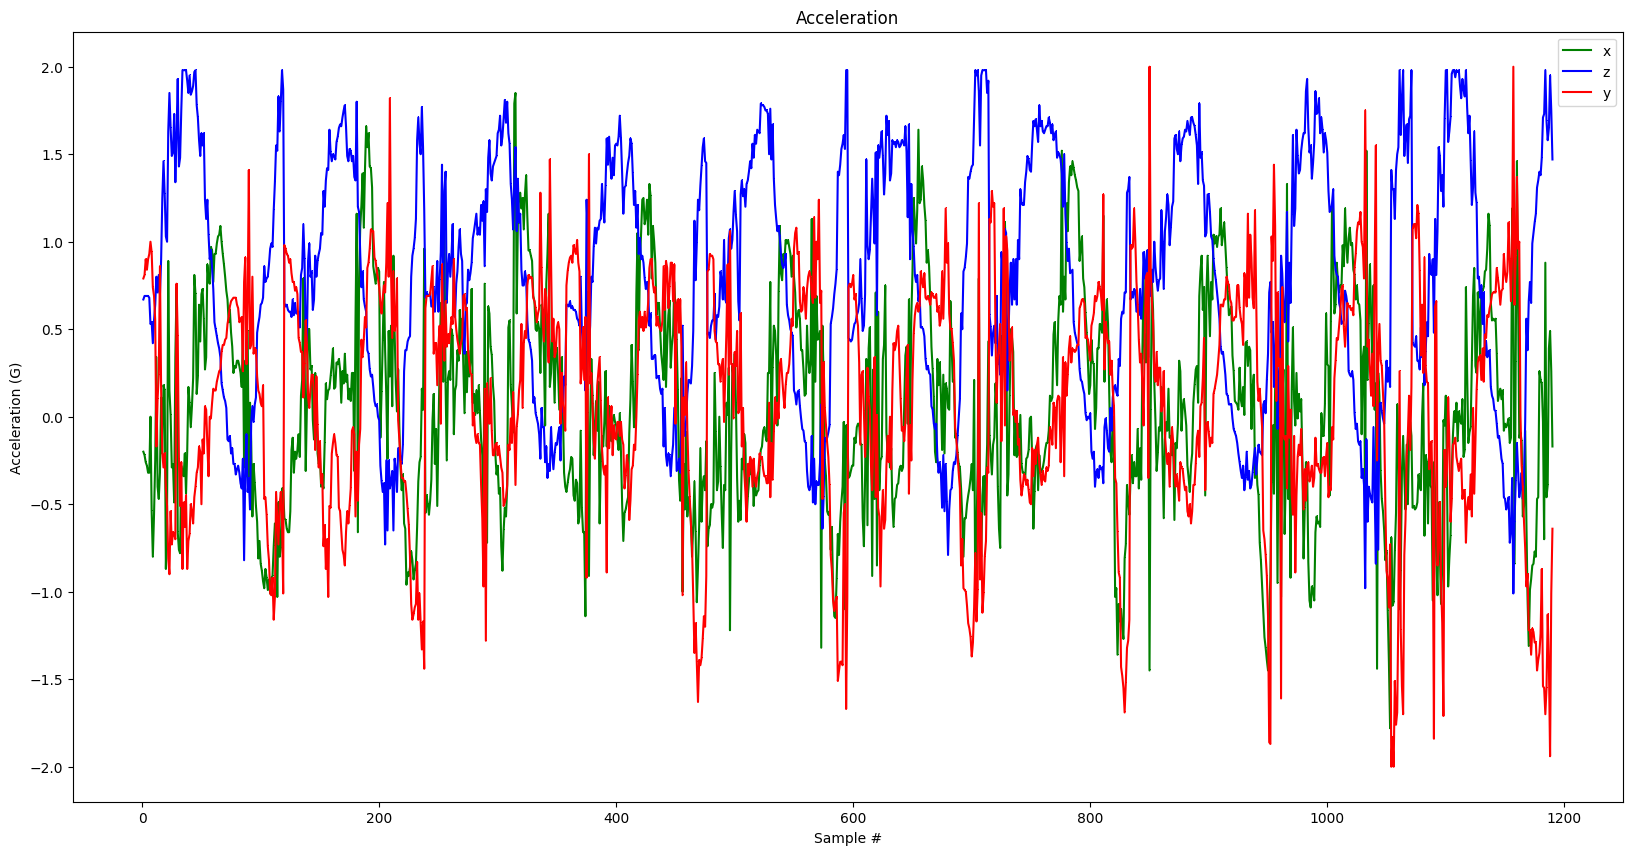

<ipython-input-2-d4685a220d1a>:33: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['p1'], 'g.', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:34: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['p2'], 'b.', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:35: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['p3'], 'r.', linestyle='solid', marker=',')


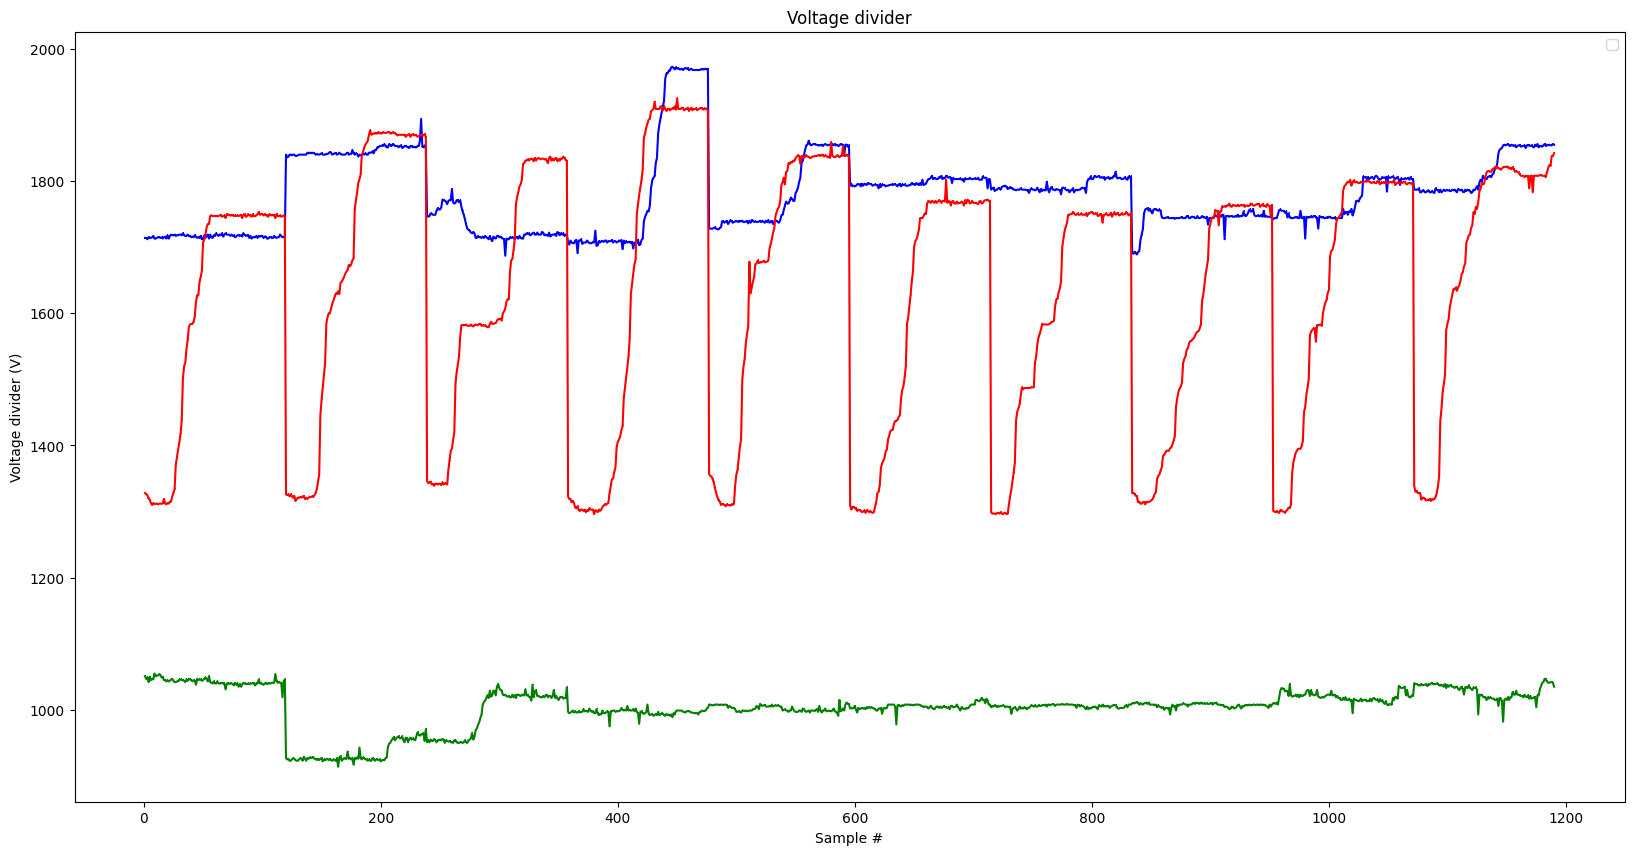

<ipython-input-2-d4685a220d1a>:52: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:53: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'], 'b.', label='z', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:54: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gY'], 'r.', label='y', linestyle='solid', marker=',')


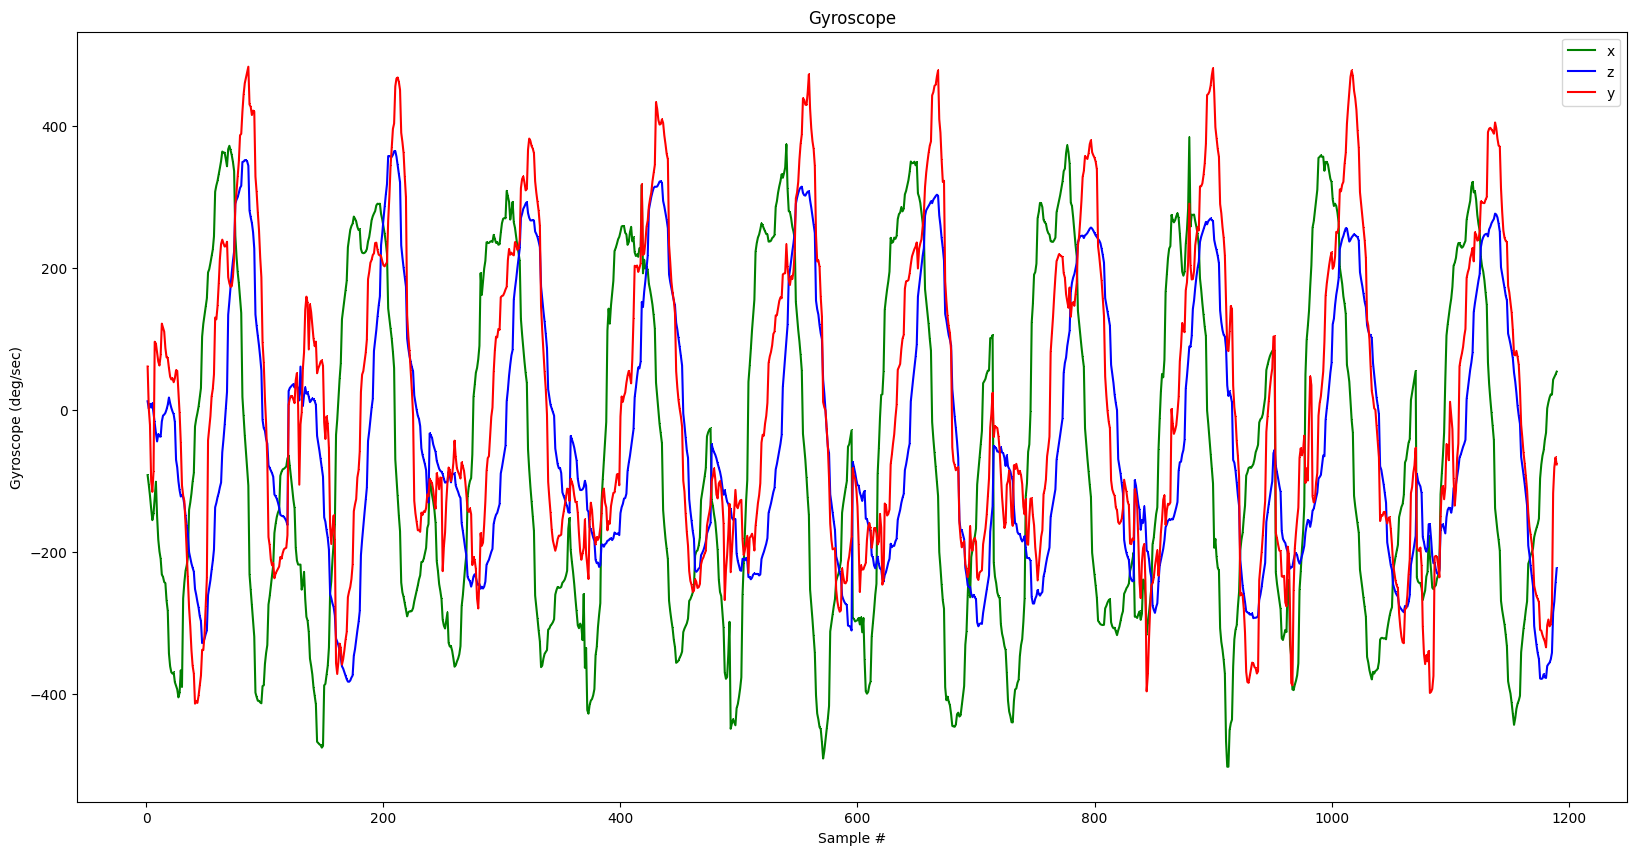

<ipython-input-2-d4685a220d1a>:61: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:62: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'b.', label='z', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:63: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'r.', label='y', linestyle='solid', marker=',')


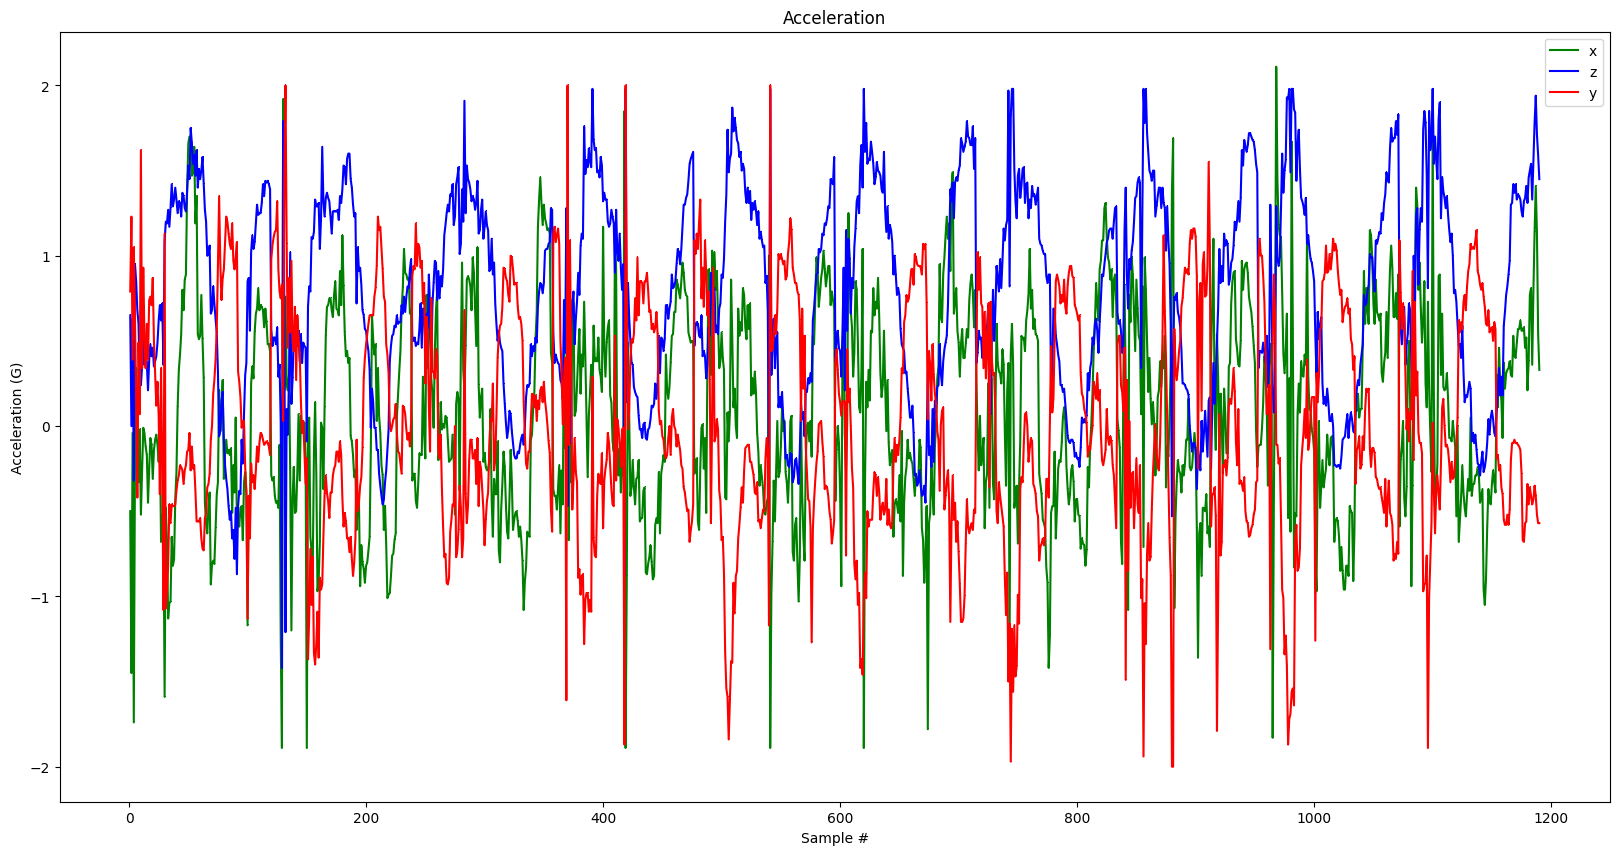

<ipython-input-2-d4685a220d1a>:71: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['p1'], 'g.', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:72: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['p2'], 'b.', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:73: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['p3'], 'r.', linestyle='solid', marker=',')


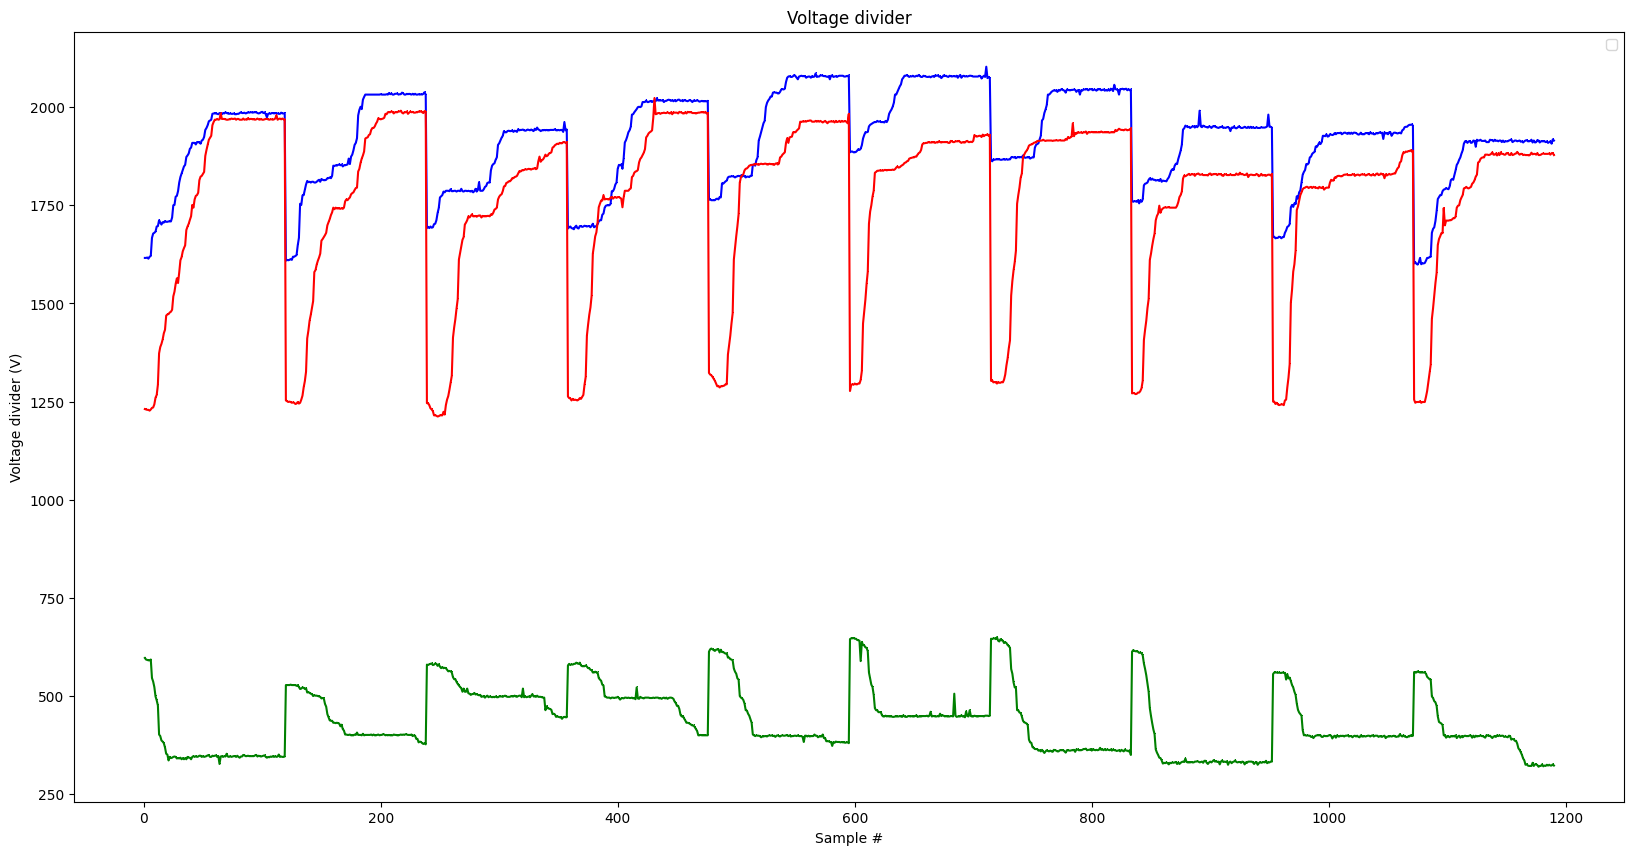

<ipython-input-2-d4685a220d1a>:90: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:91: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'], 'b.', label='z', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:92: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gY'], 'r.', label='y', linestyle='solid', marker=',')


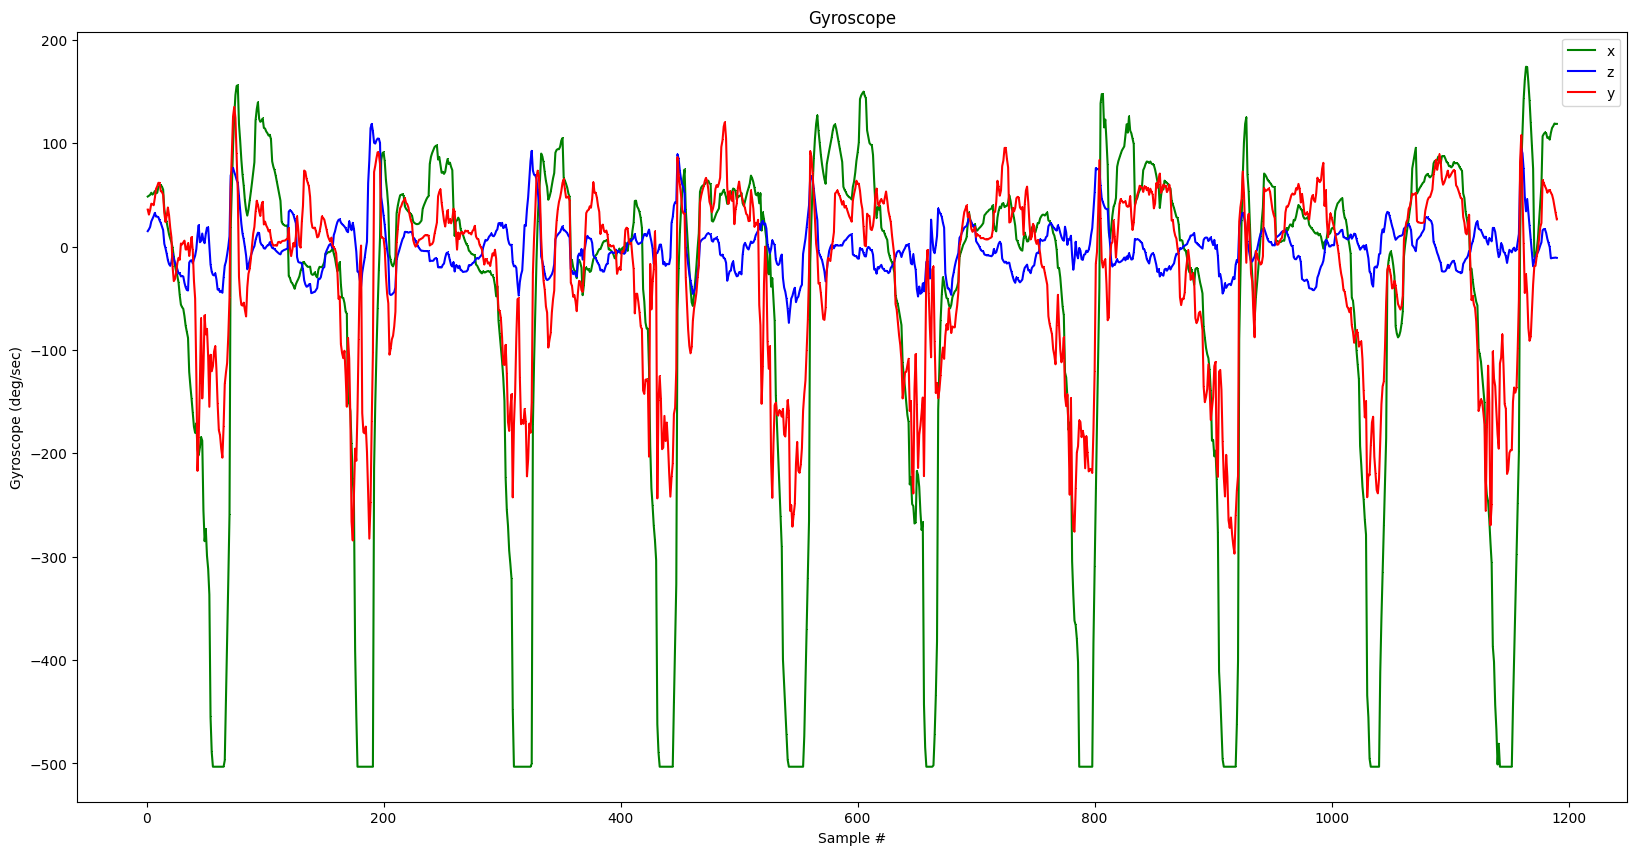

<ipython-input-2-d4685a220d1a>:99: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:100: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'b.', label='z', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:101: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'r.', label='y', linestyle='solid', marker=',')


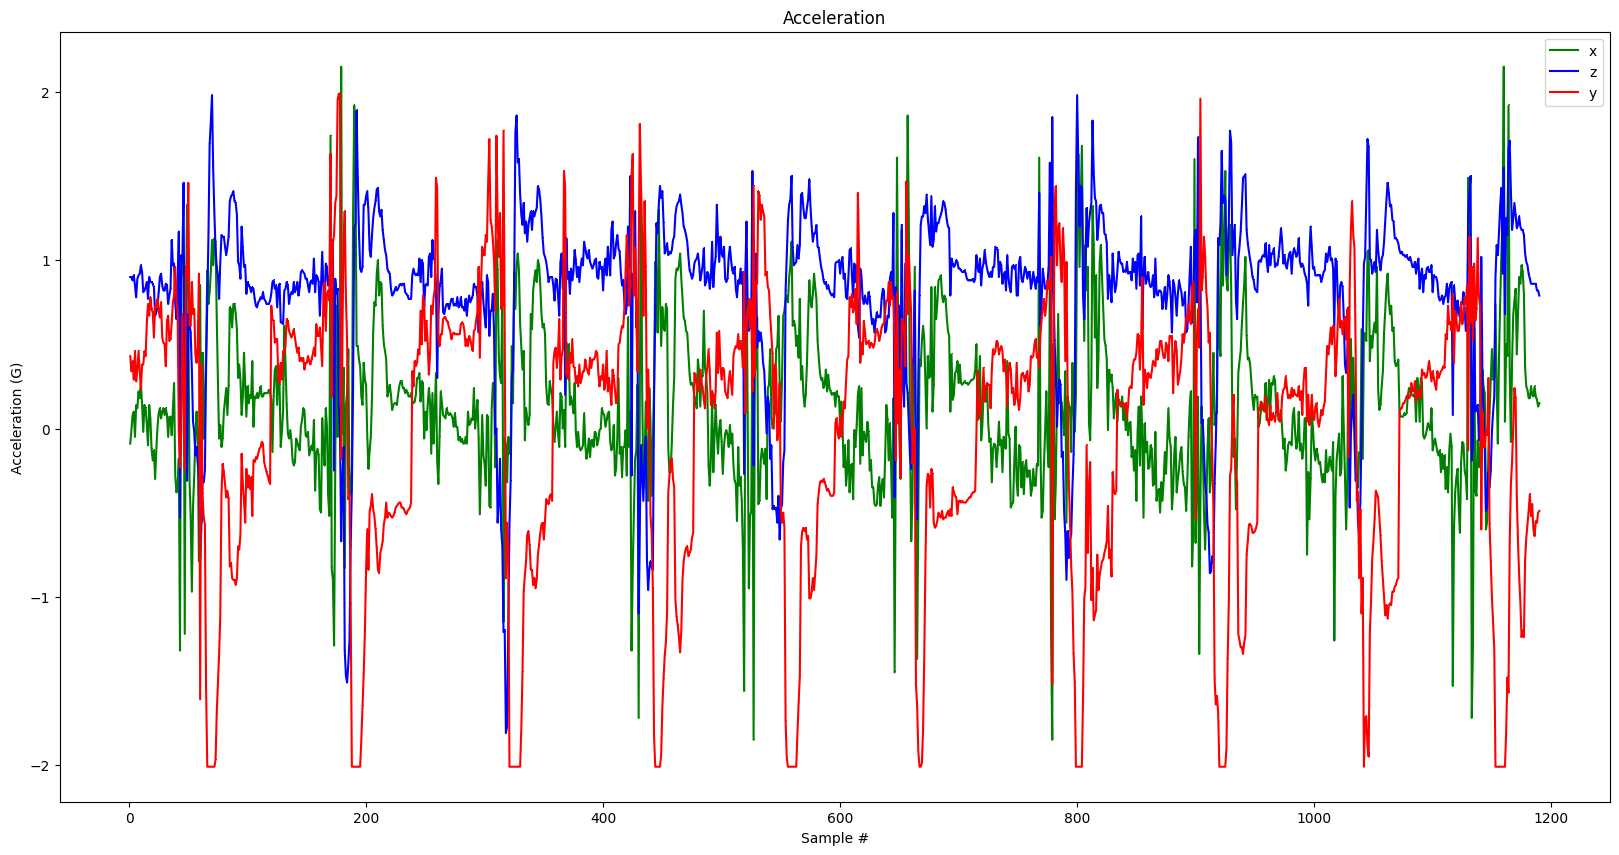

<ipython-input-2-d4685a220d1a>:109: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['p1'], 'g.', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:110: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['p2'], 'b.', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:111: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['p3'], 'r.', linestyle='solid', marker=',')


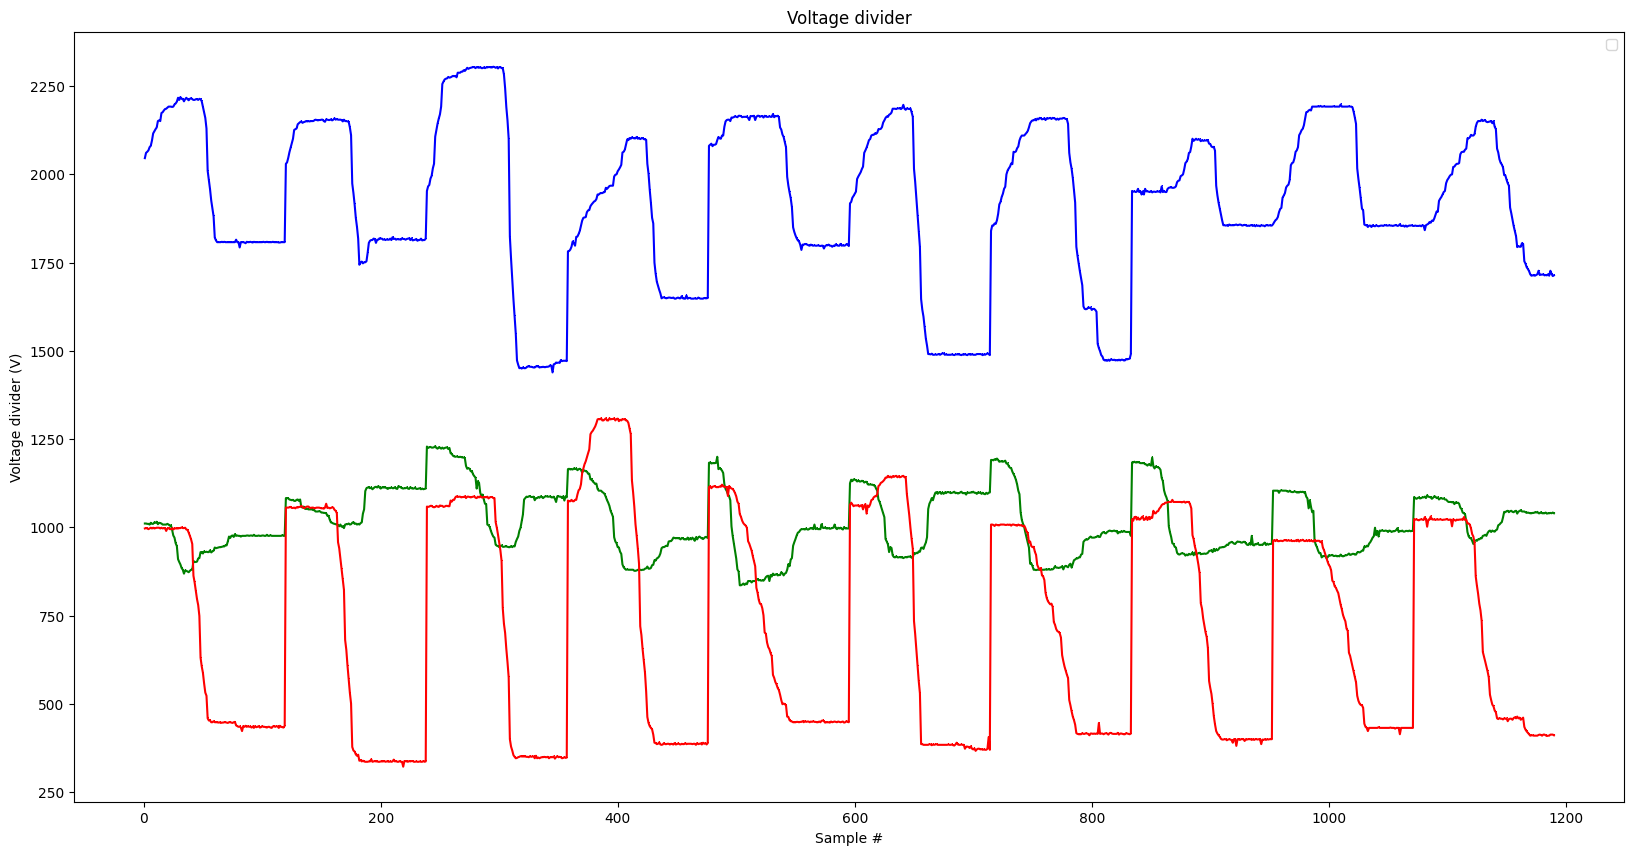

<ipython-input-2-d4685a220d1a>:129: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:130: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'], 'b.', label='z', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:131: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gY'], 'r.', label='y', linestyle='solid', marker=',')


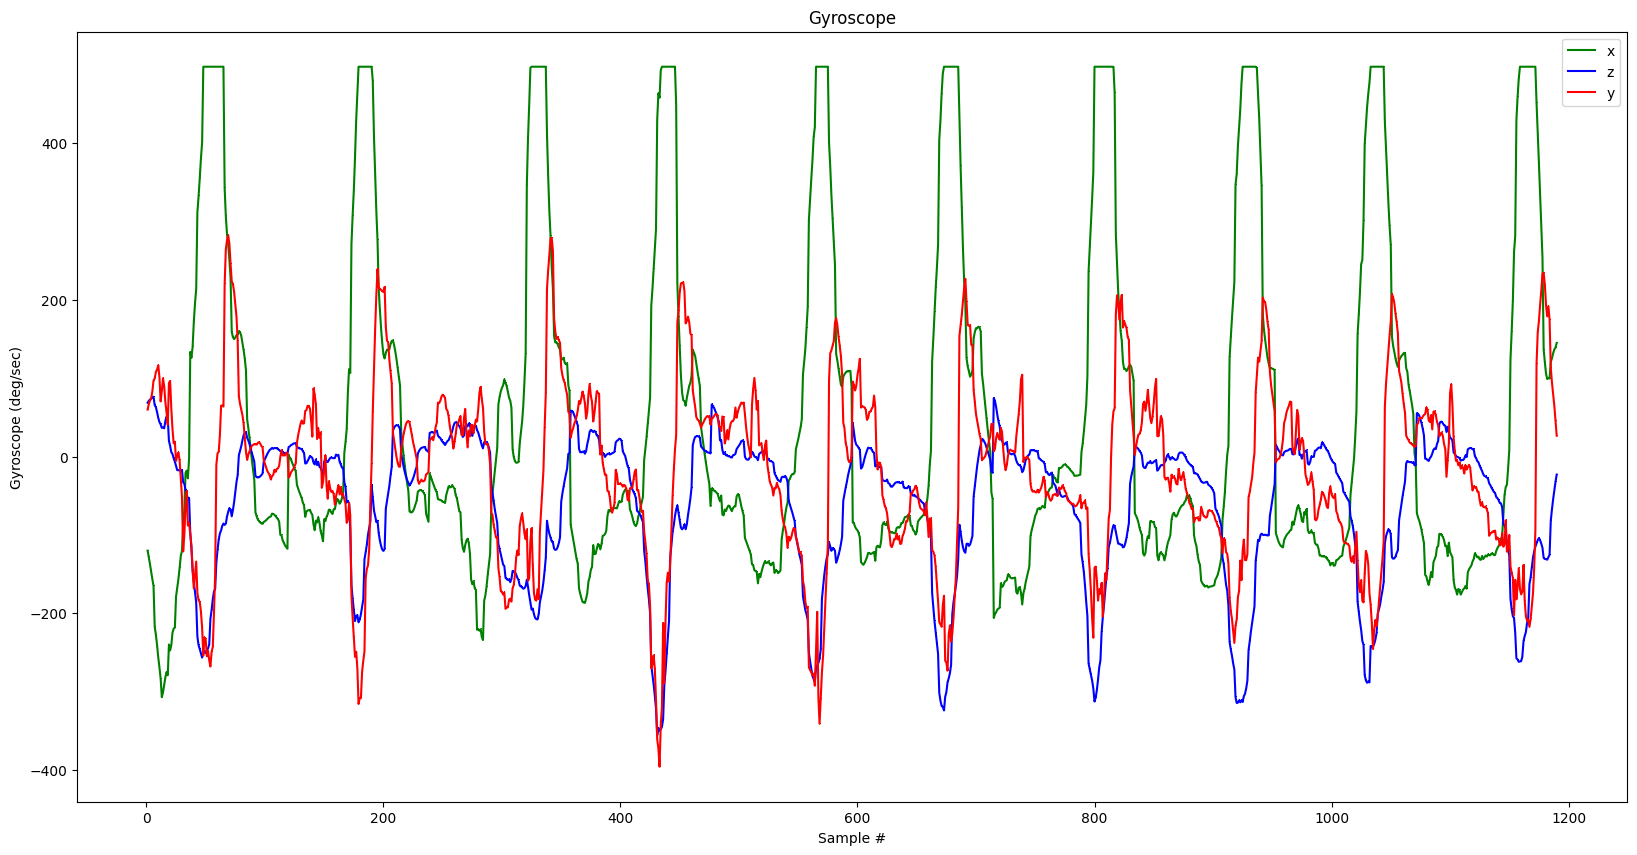

<ipython-input-2-d4685a220d1a>:138: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:139: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'b.', label='z', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:140: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'r.', label='y', linestyle='solid', marker=',')


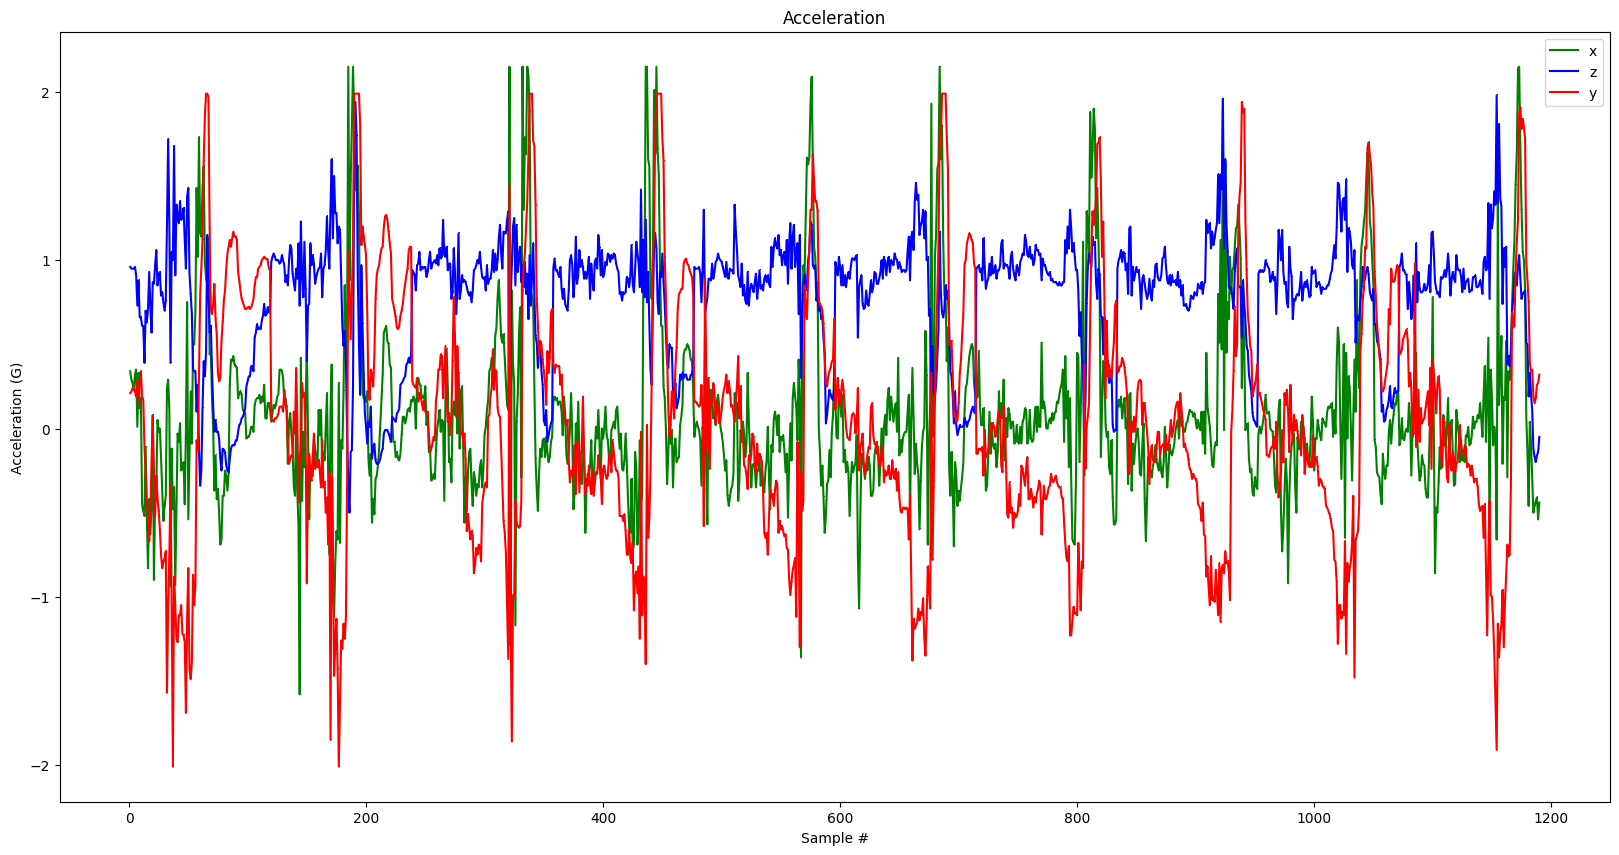

<ipython-input-2-d4685a220d1a>:148: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['p1'], 'g.', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:149: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['p2'], 'b.', linestyle='solid', marker=',')
<ipython-input-2-d4685a220d1a>:150: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['p3'], 'r.', linestyle='solid', marker=',')


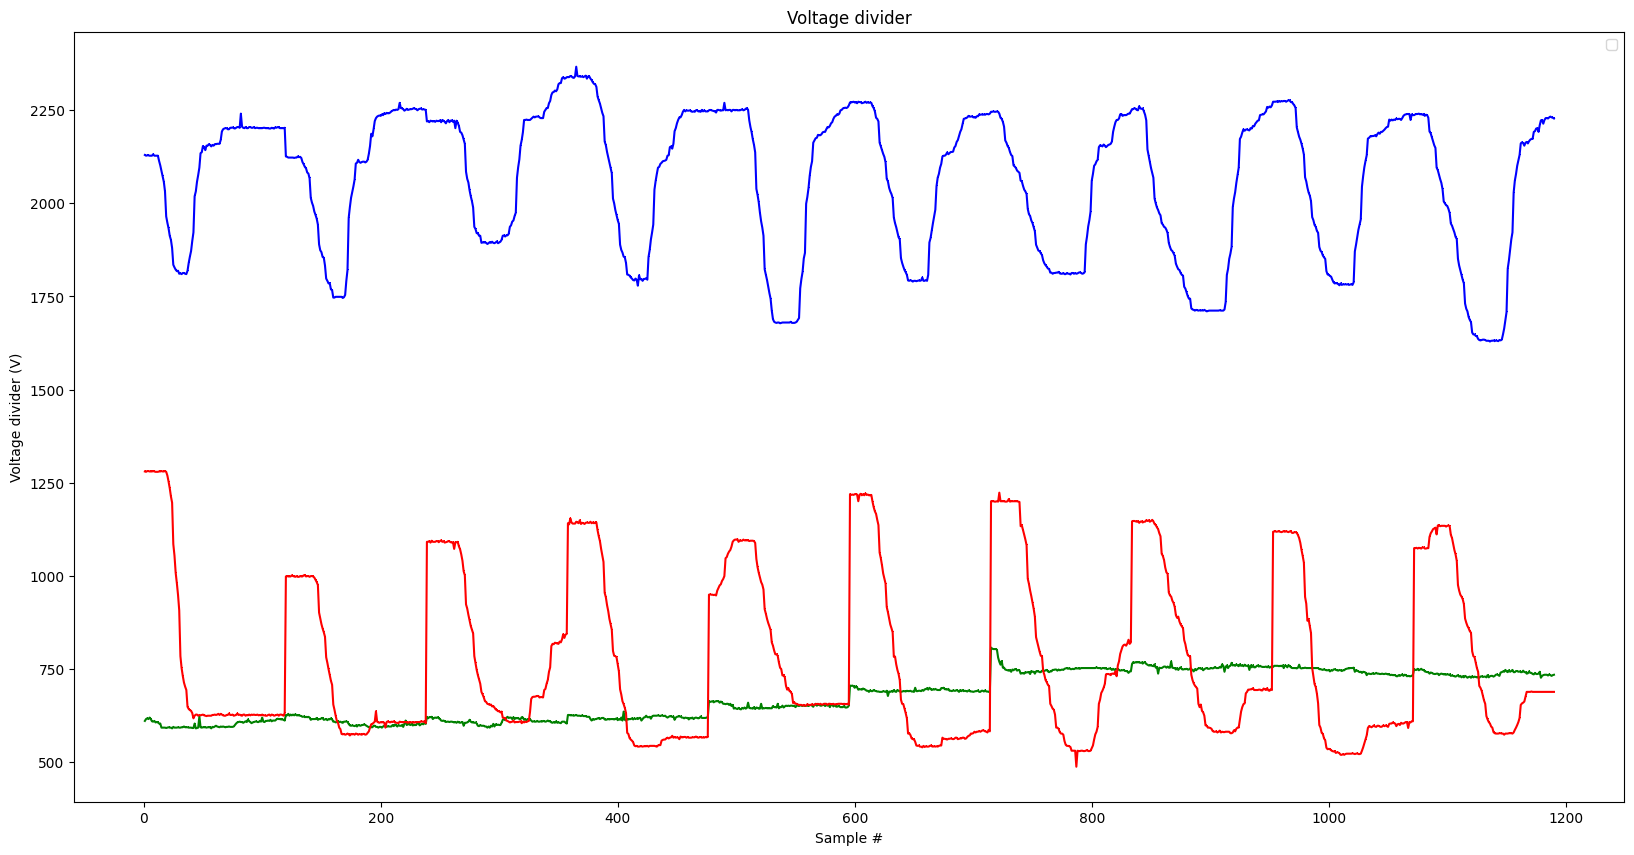

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename = "forward.csv"

df = pd.read_csv("/content/" + filename)

index = range(1, len(df['gX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)


plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'b.', label='z', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'r.', label='y', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'b.', label='z', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'r.', label='y', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()


plt.plot(index, df['p1'], 'g.', linestyle='solid', marker=',')
plt.plot(index, df['p2'], 'b.', linestyle='solid', marker=',')
plt.plot(index, df['p3'], 'r.', linestyle='solid', marker=',')
plt.title("Voltage divider")
plt.xlabel("Sample #")
plt.ylabel("Voltage divider (V)")
plt.legend()
plt.show()


filename = "back.csv"

df = pd.read_csv("/content/" + filename)

index = range(1, len(df['gX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)


plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'b.', label='z', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'r.', label='y', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'b.', label='z', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'r.', label='y', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()


plt.plot(index, df['p1'], 'g.', linestyle='solid', marker=',')
plt.plot(index, df['p2'], 'b.', linestyle='solid', marker=',')
plt.plot(index, df['p3'], 'r.', linestyle='solid', marker=',')
plt.title("Voltage divider")
plt.xlabel("Sample #")
plt.ylabel("Voltage divider (V)")
plt.legend()
plt.show()


filename = "min.csv"

df = pd.read_csv("/content/" + filename)

index = range(1, len(df['gX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)


plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'b.', label='z', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'r.', label='y', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'b.', label='z', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'r.', label='y', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()


plt.plot(index, df['p1'], 'g.', linestyle='solid', marker=',')
plt.plot(index, df['p2'], 'b.', linestyle='solid', marker=',')
plt.plot(index, df['p3'], 'r.', linestyle='solid', marker=',')
plt.title("Voltage divider")
plt.xlabel("Sample #")
plt.ylabel("Voltage divider (V)")
plt.legend()
plt.show()



filename = "max.csv"

df = pd.read_csv("/content/" + filename)

index = range(1, len(df['gX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)


plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'b.', label='z', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'r.', label='y', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'b.', label='z', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'r.', label='y', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()


plt.plot(index, df['p1'], 'g.', linestyle='solid', marker=',')
plt.plot(index, df['p2'], 'b.', linestyle='solid', marker=',')
plt.plot(index, df['p3'], 'r.', linestyle='solid', marker=',')
plt.title("Voltage divider")
plt.xlabel("Sample #")
plt.ylabel("Voltage divider (V)")
plt.legend()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

print(f"TensorFlow version = {tf.__version__}\n")

SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

GESTURES = [
    "forward",
    "back",
    "min",
    "max"
]

SAMPLES_PER_GESTURE = 119

NUM_GESTURES = len(GESTURES)

ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")

  output = ONE_HOT_ENCODED_GESTURES[gesture_index]

  df = pd.read_csv("/content/" + gesture + ".csv")

  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)

  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")

  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j

      tensor += [
          (df['gX'][index] + 600) / 1200,
          (df['gZ'][index] + 600) / 1200,
          (df['gY'][index] + 600) / 1200,
          (df['aX'][index] + 2.0) / 5,
          (df['aZ'][index] + 2.0) / 5,
          (df['aY'][index] + 2.0) / 5,
          (df['p1'][index]) / 2500,
          (df['p2'][index]) / 2500,
          (df['p3'][index]) / 2500
      ]

    inputs.append(tensor)
    outputs.append(output)

inputs = np.array(inputs)
outputs = np.array(outputs)
print(inputs)
print("Data set parsing and preparation complete.")

TensorFlow version = 2.12.0-rc1

Processing index 0 for gesture 'forward'.
	There are 10 recordings of the forward gesture.
Processing index 1 for gesture 'back'.
	There are 10 recordings of the back gesture.
Processing index 2 for gesture 'min'.
	There are 10 recordings of the min gesture.
Processing index 3 for gesture 'max'.
	There are 10 recordings of the max gesture.
[[0.41391667 0.5006     0.442225   ... 0.4184     0.686      0.698     ]
 [0.42746667 0.514525   0.39558333 ... 0.3884     0.74       0.7468    ]
 [0.47398333 0.51123333 0.37088333 ... 0.4136     0.6876     0.732     ]
 ...
 [0.43978333 0.50991667 0.50195833 ... 0.3028     0.9052     0.2772    ]
 [0.418475   0.51245833 0.49380833 ... 0.2936     0.8948     0.2436    ]
 [0.44000833 0.546125   0.53395833 ... 0.2936     0.8912     0.2752    ]]
Data set parsing and preparation complete.


In [ ]:
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

inputs = inputs[randomize]
outputs = outputs[randomize]

TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=600, batch_size=1, validation_data=(inputs_validate, outputs_validate))



Epoch 1/600
24/24 [==============================] - 1s 7ms/step - loss: 0.1985 - mae: 0.3610 - val_loss: 0.2374 - val_mae: 0.4127
Epoch 2/600
24/24 [==============================] - 0s 2ms/step - loss: 0.1714 - mae: 0.3468 - val_loss: 0.2392 - val_mae: 0.4051
Epoch 3/600
24/24 [==============================] - 0s 3ms/step - loss: 0.1562 - mae: 0.3215 - val_loss: 0.2136 - val_mae: 0.3880
Epoch 4/600
24/24 [==============================] - 0s 3ms/step - loss: 0.1356 - mae: 0.2955 - val_loss: 0.2269 - val_mae: 0.3822
Epoch 5/600
24/24 [==============================] - 0s 3ms/step - loss: 0.1296 - mae: 0.2852 - val_loss: 0.1927 - val_mae: 0.3618
Epoch 6/600
24/24 [==============================] - 0s 2ms/step - loss: 0.1119 - mae: 0.2583 - val_loss: 0.2033 - val_mae: 0.3667
Epoch 7/600
24/24 [==============================] - 0s 3ms/step - loss: 0.0966 - mae: 0.2344 - val_loss: 0.1837 - val_mae: 0.3470
Epoch 8/600
24/24 [==============================] - 0s 2ms/step - loss: 0.0862 - m

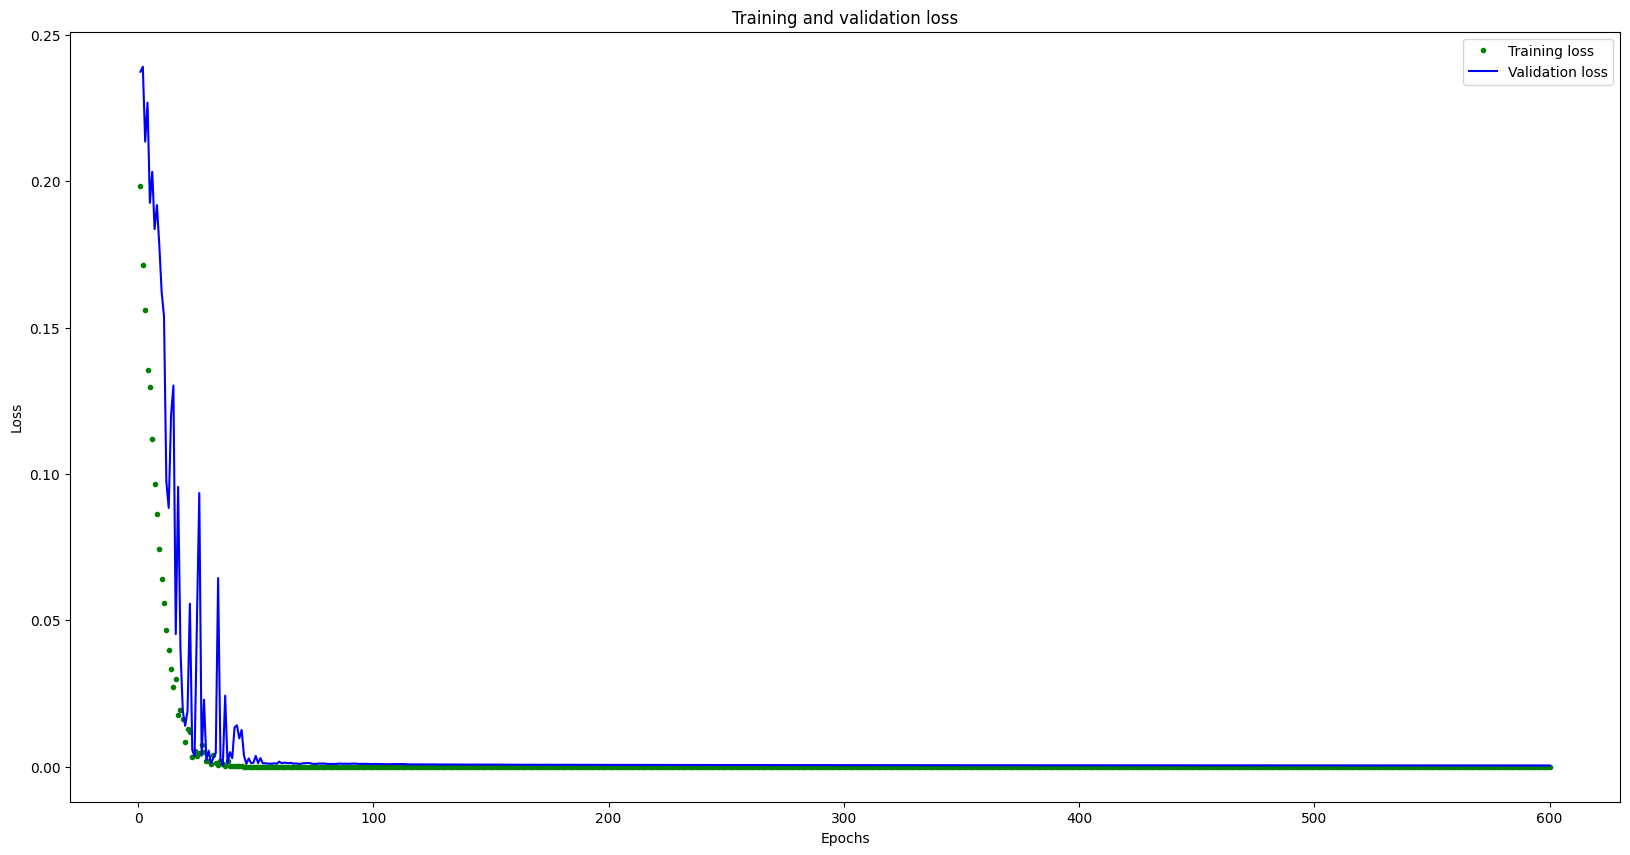

[20.0, 10.0]


In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

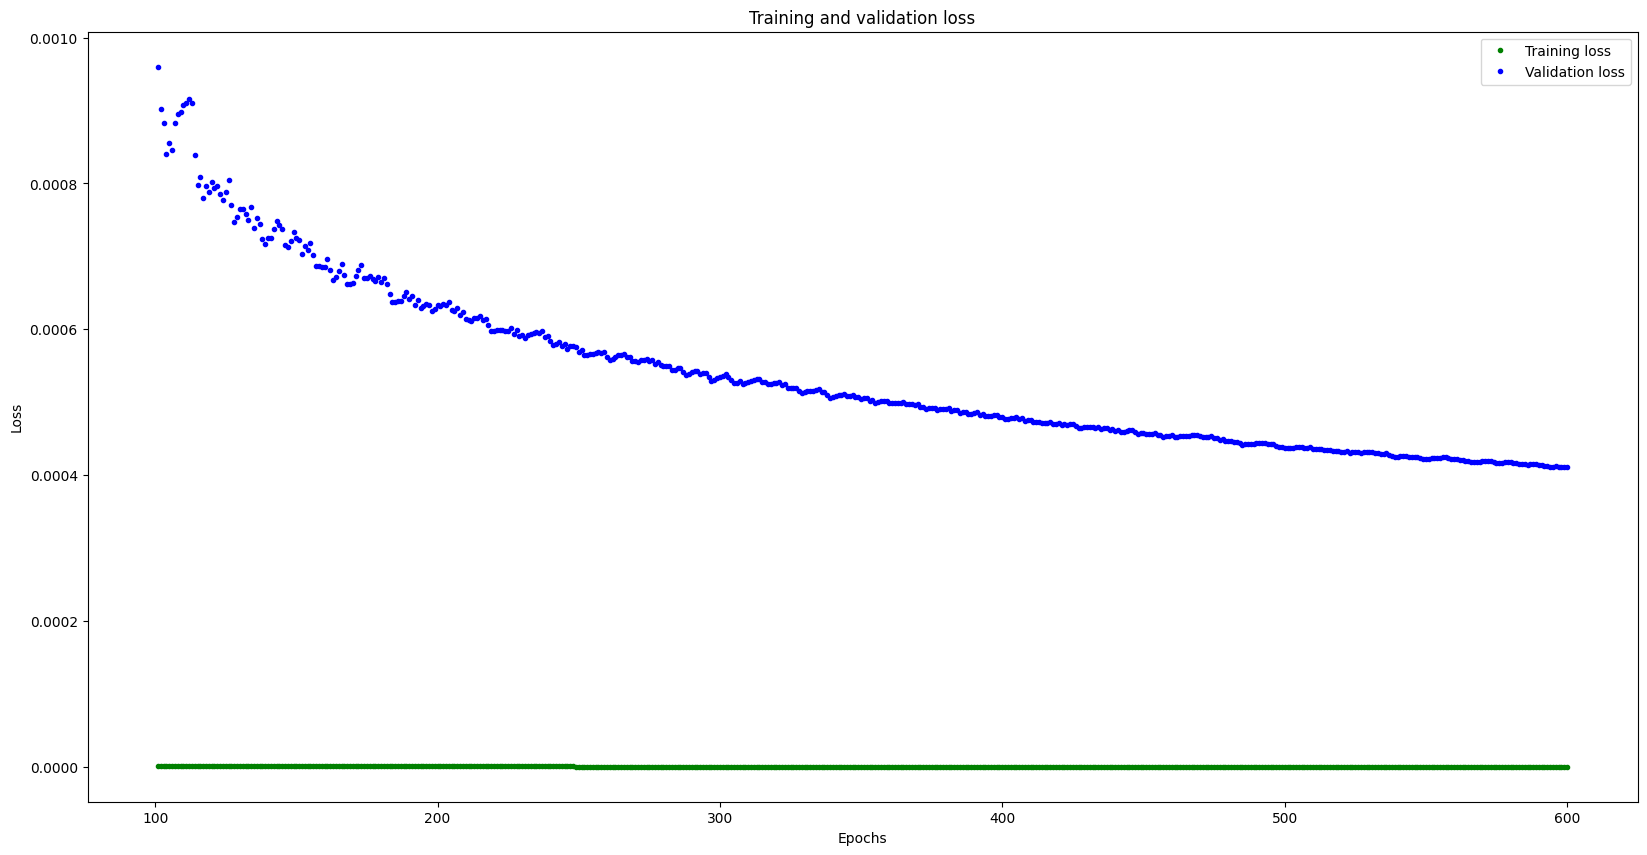

In [ ]:
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

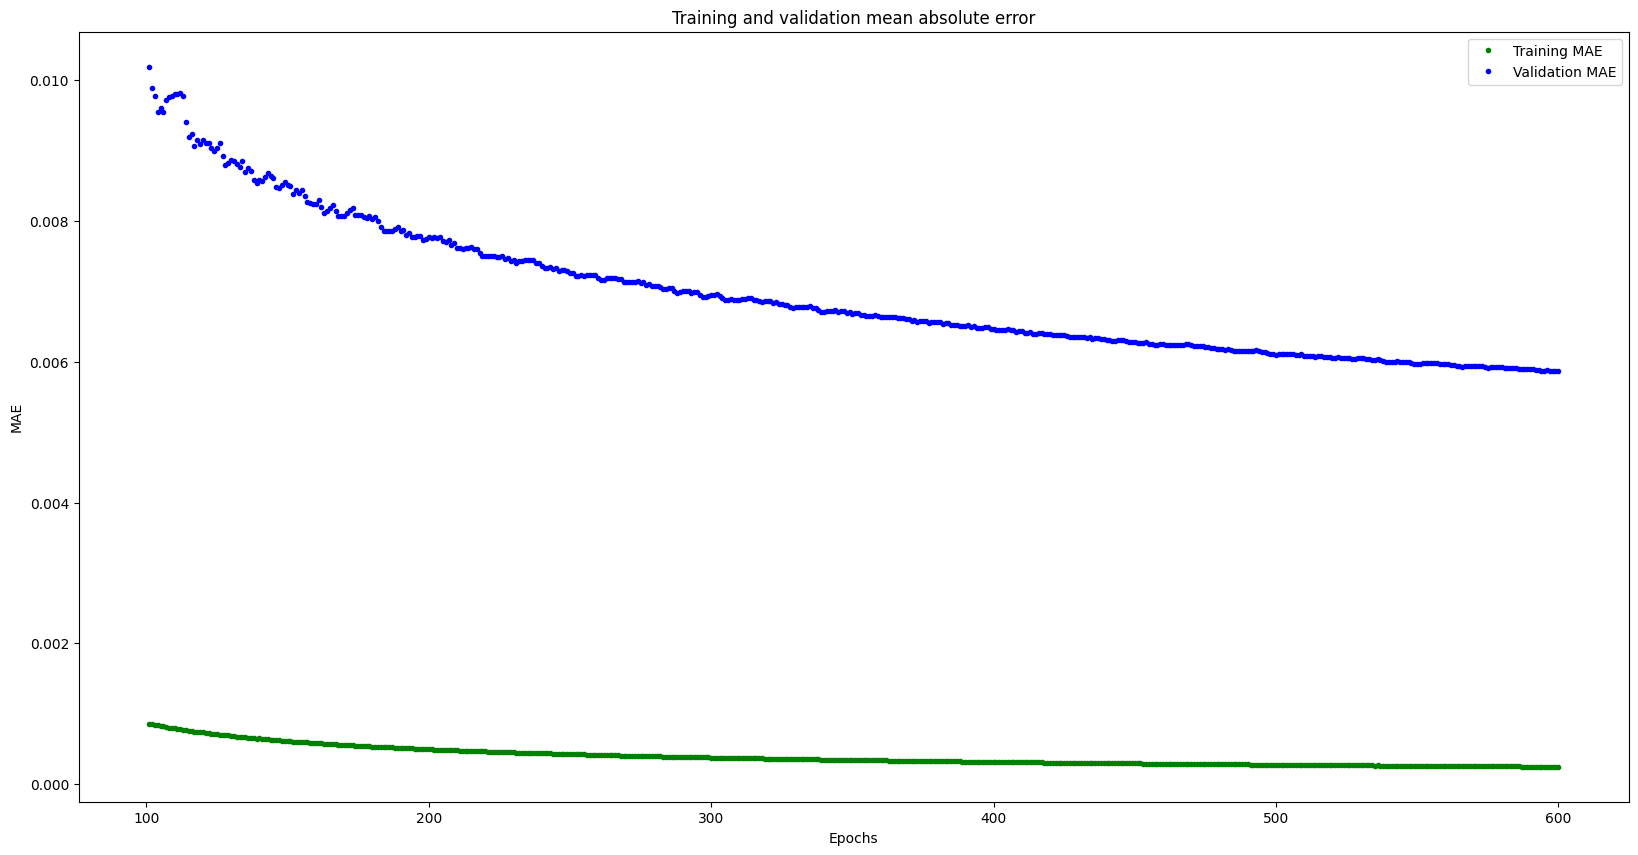

In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [ ]:
predictions = model.predict(inputs_test)

print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

1/1 [==============================] - 0s 93ms/step
predictions =
 [[0.003 0.084 0.    0.913]
 [0.001 0.002 0.    0.996]
 [1.    0.    0.    0.   ]
 [0.    0.    0.998 0.002]
 [0.    0.    0.001 0.999]
 [0.    0.    0.    0.999]
 [0.    0.    1.    0.   ]
 [1.    0.    0.    0.   ]]
actual =
 [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

open("gesture_model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)



Model is 219812 bytes


In [ ]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 1,355,542 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.
